Find the markdown blocks that say interaction required! The notebook should take care of the rest!

# Import libs

In [1]:
import sys
import os
sys.path.append('..')
from eflow.foundation import DataPipeline,DataFrameTypes
from eflow.model_analysis import ClassificationAnalysis
from eflow.utils.modeling_utils import optimize_model_grid
from eflow.utils.eflow_utils import get_type_holder_from_pipeline, remove_unconnected_pipeline_segments
from eflow.utils.pandas_utils import data_types_table
from eflow.auto_modeler import AutoCluster

import pandas as pd
import numpy as np
import scikitplot as skplt
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import copy
import pickle
from IPython.display import clear_output

In [2]:
# # Additional add ons
# !pip install pandasgui
# !pip install pivottablejs
# clear_output()

In [3]:
%matplotlib notebook
%matplotlib inline

## Declare Project Variables

### Interaction required

In [4]:
dataset_path = "Datasets/titanic_train.csv"

# -----
dataset_name = "Titanic Data"
pipeline_name = "Titanic Pipeline"

# -----


# -----
notebook_mode = True

## Clean out segment space

In [5]:
remove_unconnected_pipeline_segments()

# Import dataset

In [6]:
df = pd.read_csv(dataset_path)
shape_df = pd.DataFrame.from_dict({'Rows': [df.shape[0]],
                                   'Columns': [df.shape[1]]})
display(shape_df)
display(df.head(30))

,Rows,Columns
0,891,12


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [7]:
data_types_table(df)

,Data Types
Features,
Age,float64
Fare,float64
PassengerId,int64
Survived,int64
Pclass,int64
SibSp,int64
Parch,int64
Name,object
Sex,object


# Loading and init df_features

In [8]:
# Option: 1
# df_features = get_type_holder_from_pipeline(pipeline_name)

In [9]:
# Option: 2
df_features = DataFrameTypes()
df_features.init_on_json_file(os.getcwd() + f"/eflow Data/{dataset_name}/df_features.json")

In [10]:
df_features.display_features(display_dataframes=True,
                             notebook_mode=notebook_mode)

,Data Types
Features,
Sex,string
Pclass,string
Cabin,string
Embarked,string
Survived,bool
Parch,integer
SibSp,integer
Fare,float
Age,float


# Any extra processing before eflow DataPipeline

# Setup pipeline structure

### Interaction Required

In [11]:
main_pipe = DataPipeline(pipeline_name,
                         df,
                         df_features)

The file 'root_pipeline.json' exist!
Now configuring object with proper pipeline segments...
Removing the feature: "Ticket"
Removing the feature: "Name"
Removing the feature: "PassengerId"


In [12]:
main_pipe.perform_pipeline(df,
                           df_features)

Ignore feature:  Fare


In [13]:
df

,Survived,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Embarked_Cherbourg,Embarked_Queenstown,Embarked_Southampton
0,0,22.000000,1,0,7.2500,False,True,False,False,True,False,False,True
1,1,38.000000,1,0,71.2833,True,False,True,False,False,True,False,False
2,1,26.000000,0,0,7.9250,True,False,False,False,True,False,False,True
3,1,35.000000,1,0,53.1000,True,False,True,False,False,False,False,True
4,0,35.000000,0,0,8.0500,False,True,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,27.000000,0,0,13.0000,False,True,False,True,False,False,False,True
887,1,19.000000,0,0,30.0000,True,False,True,False,False,False,False,True
888,0,29.444268,1,2,23.4500,True,False,False,False,True,False,False,True
889,1,26.000000,0,0,30.0000,False,True,True,False,False,True,False,False


# Generate clustering models with automodeler


Inspecting scaled results!


,Mean,Standard Dev
Survived,3.987333e-17,1.0
Age,1.594933e-16,1.0
SibSp,4.386066e-17,1.0
Parch,5.382900e-17,1.0
Fare,3.987333e-18,1.0
Sex_female,3.987333e-17,1.0
Sex_male,-1.156327e-16,1.0
Pclass_1,-7.575933e-17,1.0
Pclass_2,1.993666e-17,1.0
Pclass_3,-6.778466e-17,1.0


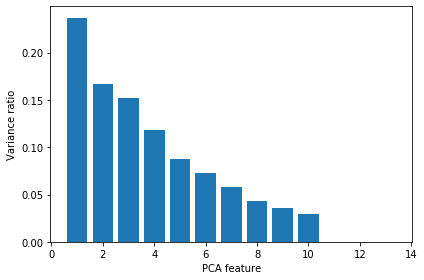

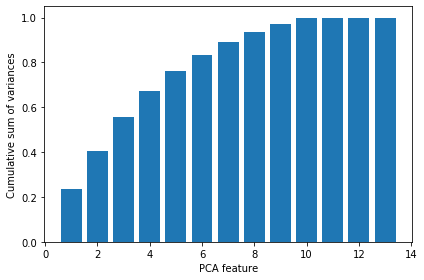


Inspecting applied scaler and pca results!


,Mean,Standard Dev
PCA_Feature_1,5.980999e-17,1.755406e+00
PCA_Feature_2,-3.189866e-17,1.473500e+00
PCA_Feature_3,8.572766e-17,1.403483e+00
PCA_Feature_4,-2.392400e-17,1.237023e+00
PCA_Feature_5,-5.582266e-17,1.063722e+00
PCA_Feature_6,7.974666e-18,9.749387e-01
PCA_Feature_7,9.768966e-17,8.667995e-01
PCA_Feature_8,5.980999e-18,7.509349e-01
PCA_Feature_9,4.984166e-17,6.864391e-01
PCA_Feature_10,-1.036707e-16,6.155528e-01


After applying pca with a cutoff percentage 0.8% for the cumulative index. Using features 1 to 6
Old shape (891, 13)
New shape (891, 6)

Inspecting data after final scaler applied!


,Mean,Standard Dev
PCA_Feature_1,7.974666e-18,1.0
PCA_Feature_2,-2.392400e-17,1.0
PCA_Feature_3,1.395567e-17,1.0
PCA_Feature_4,-1.196200e-17,1.0
PCA_Feature_5,-7.974666e-18,1.0
PCA_Feature_6,7.974666e-18,1.0


In [14]:
auto_cluster = AutoCluster(df,
                           df_features,
                           project_sub_dir=dataset_name,
                           overwrite_full_path=None,
                           notebook_mode=True)

### Temporialy remove dataframe to save RAM for processing

In [15]:
del df

# Inspect Hierarchical models

Creating graphic for Hierarchical Clustering Method: complete...


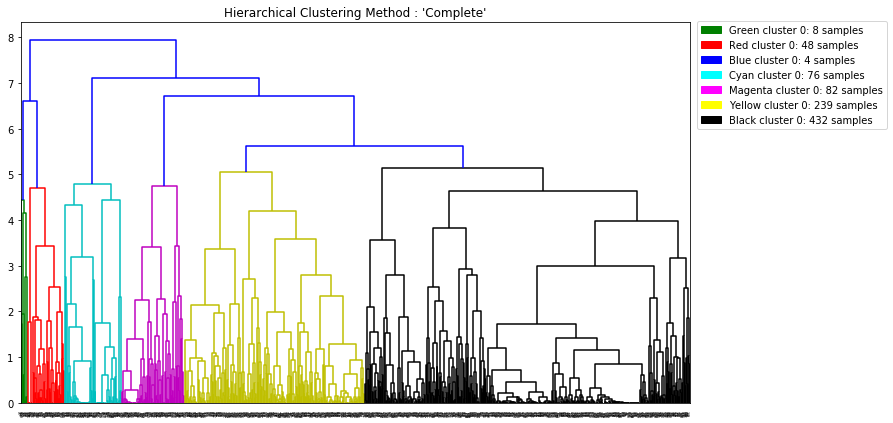

Creating graphic for Hierarchical Clustering Method: single...


<Figure size 432x288 with 0 Axes>

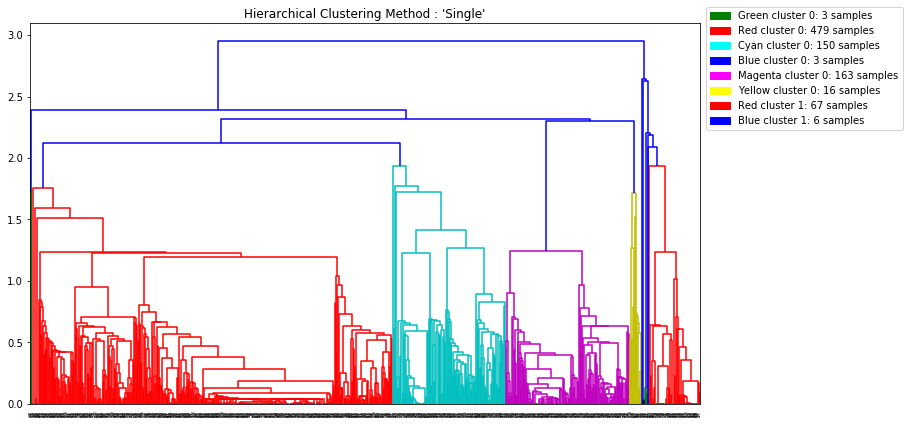

Creating graphic for Hierarchical Clustering Method: weighted...


<Figure size 432x288 with 0 Axes>

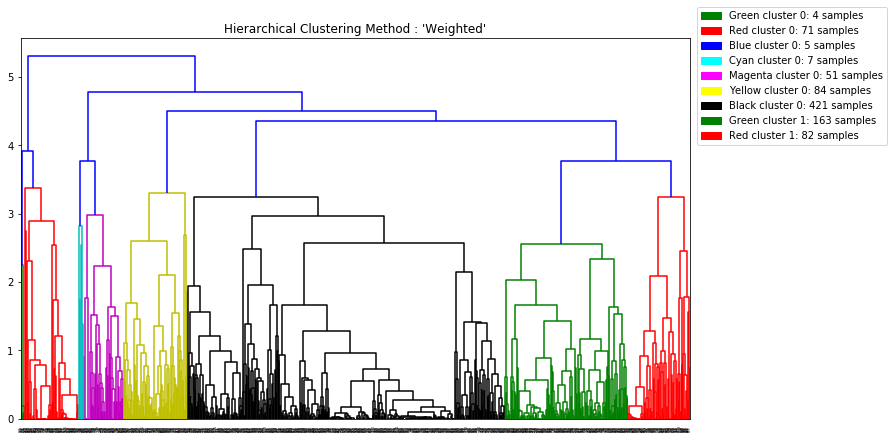

Creating graphic for Hierarchical Clustering Method: ward...


<Figure size 432x288 with 0 Axes>

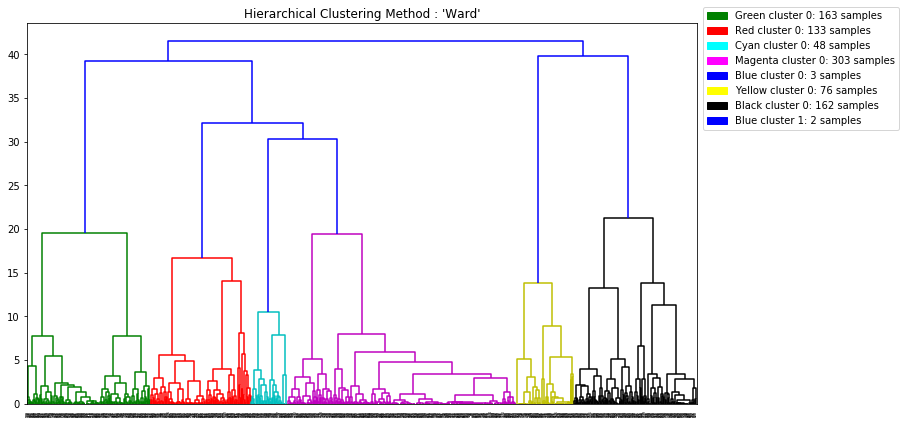

Creating graphic for Hierarchical Clustering Method: average...


<Figure size 432x288 with 0 Axes>

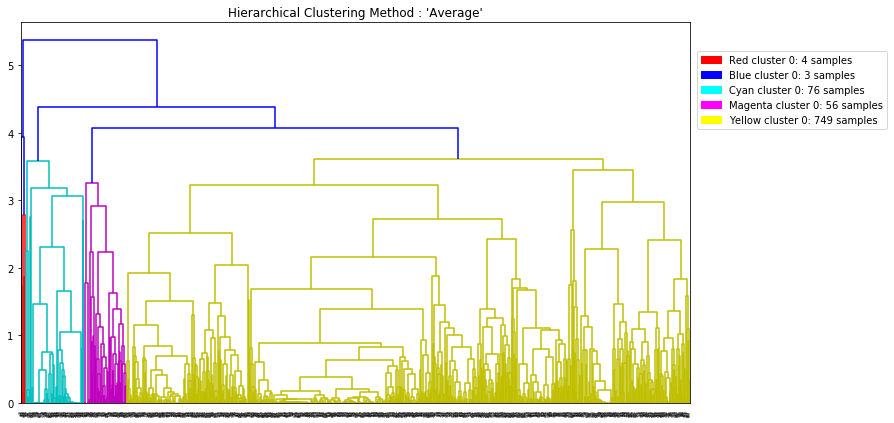

Creating graphic for Hierarchical Clustering Method: centroid...


<Figure size 432x288 with 0 Axes>

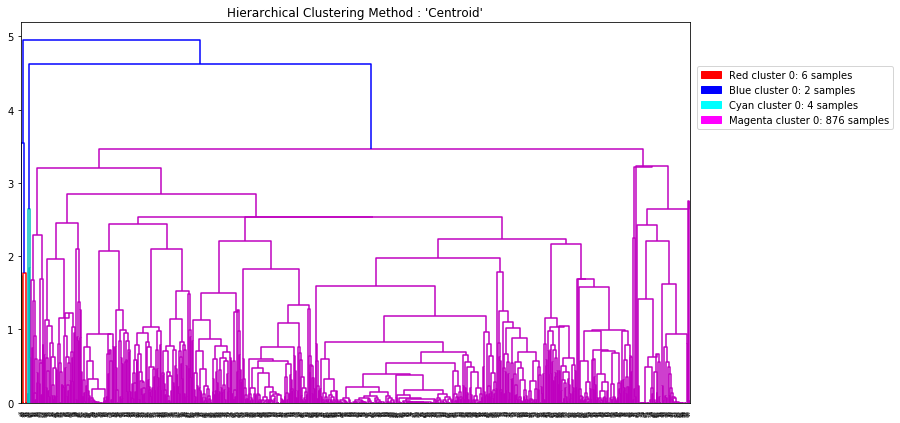

Creating graphic for Hierarchical Clustering Method: median...


<Figure size 432x288 with 0 Axes>

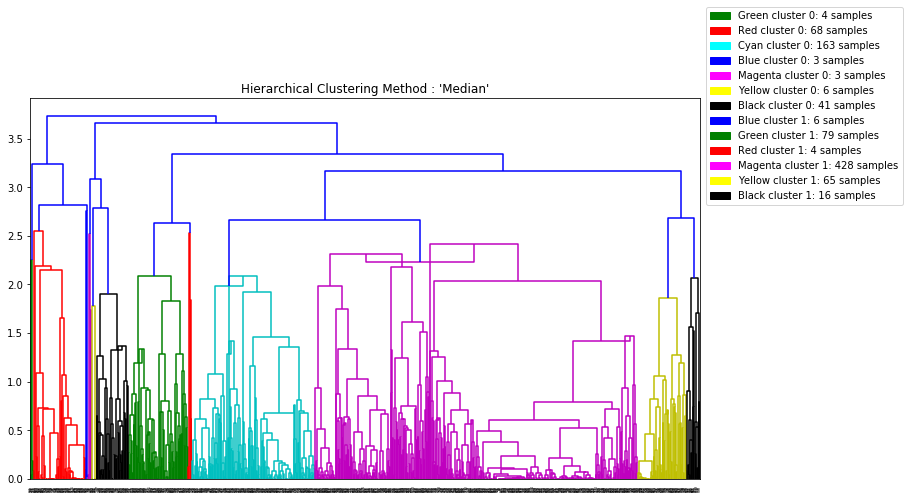

<Figure size 432x288 with 0 Axes>

In [16]:
auto_cluster.visualize_hierarchical_clustering()

In [17]:
raise ValueError("Testing")

ValueError: Testing

In [ ]:
df = pd.read_csv(dataset_path)
df

In [ ]:
df_features.init_on_json_file(os.getcwd() + f"/eflow Data/{dataset_name}/df_features.json")
df_features.display_features(display_dataframes=True,
                             notebook_mode=notebook_mode)

In [ ]:
main_pipe.perform_pipeline(df,
                           df_features)

In [ ]:
df